In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchsummary import summary
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import itertools
from sklearn.metrics import confusion_matrix
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import cross_val_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from functools import partial
import random
from concurrent import futures
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
# import necessary libraries
import numpy as np
# import the KNNimputer class
from sklearn.impute import KNNImputer
from numpy import isnan
from matplotlib import pyplot as plt
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

#READ DATA

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/RaveshTahghigh/CL.xlsx")
print(len(data))
data.head(5)

299


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Disease
0,63,1,typical angina,145,233,1,Estes' criteria,150,0,2.3,downsloping,0.0,fixed defect;,0
1,67,1,asymptomatic,160,286,0,Estes' criteria,108,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120,229,0,Estes' criteria,129,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130,204,0,Estes' criteria,172,0,1.4,upsloping,0.0,normal,0


In [ ]:
print(data.shape)
data.columns

(299, 14)


Index(['age ', 'sex ', 'cp ', 'trestbps ', 'chol ', 'fbs ', 'restecg ',
       'thalach ', 'exang ', 'oldpeak ', 'slope ', 'ca ', 'thal ', 'Disease'],
      dtype='object')

#X,Y

In [ ]:
#تارگت را در فولدر وای و ویژگی ها را در متغیر ایکس
train= data.iloc[:,:13]
y = data.iloc[:,13]

#ONE HOT ENCODING

In [ ]:
#one hot encoding
print(train['cp '].unique())
cpp, re, sl, th = pd.get_dummies(train[ 'cp '] ), pd.get_dummies(train['restecg '] ), pd.get_dummies(train['slope ']), pd.get_dummies(train['thal '] )
# edgham mikonim be data asli
x_train = pd.concat([train,cpp,re,sl,th],axis=1)
x_train.head(5)

['typical angina' 'asymptomatic' 'non-anginal pain' 'atypical angina']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,typical angina,Estes' criteria,abnormality,normal,downsloping,flat,upsloping,fixed defect;,normal,reversable defect
0,63,1,typical angina,145,233,1,Estes' criteria,150,0,2.3,...,1,1,0,0,1,0,0,1,0,0
1,67,1,asymptomatic,160,286,0,Estes' criteria,108,1,1.5,...,0,1,0,0,0,1,0,0,1,0
2,67,1,asymptomatic,120,229,0,Estes' criteria,129,1,2.6,...,0,1,0,0,0,1,0,0,0,1
3,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,...,0,0,0,1,1,0,0,0,1,0
4,41,0,atypical angina,130,204,0,Estes' criteria,172,0,1.4,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
del x_train['cp ']
del x_train['restecg ']
del x_train['slope ']
del x_train['thal ']
x_train.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,asymptomatic,...,typical angina,Estes' criteria,abnormality,normal,downsloping,flat,upsloping,fixed defect;,normal,reversable defect
0,63,1,145,233,1,150,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160,286,0,108,1,1.5,3.0,1,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0.0,0,...,0,0,0,1,1,0,0,0,1,0
4,41,0,130,204,0,172,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
print(x_train.shape)
x_train.columns

(299, 22)


Index(['age ', 'sex ', 'trestbps ', 'chol ', 'fbs ', 'thalach ', 'exang ',
       'oldpeak ', 'ca ', 'asymptomatic', 'atypical angina',
       'non-anginal pain', 'typical angina', ' Estes' criteria',
       'abnormality ', 'normal', 'downsloping', 'flat', 'upsloping',
       'fixed defect;', 'normal', 'reversable defect'],
      dtype='object')

#KODAM SETONHA MISSING VALUE DARAD?

In [ ]:
#نشان بده کدام ستونها داری داده های گمشده هستند
miss_count=x_train.isnull().sum()
print('Missing: %d' % sum(miss_count))
miss_count

Missing: 3


age                  0
sex                  0
trestbps             0
chol                 0
fbs                  0
thalach              0
exang                0
oldpeak              0
ca                   3
asymptomatic         0
atypical angina      0
non-anginal pain     0
typical angina       0
 Estes' criteria     0
abnormality          0
normal               0
downsloping          0
flat                 0
upsloping            0
fixed defect;        0
normal               0
reversable defect    0
dtype: int64

#HAZF MISSING VALUE BA K-NN

In [ ]:
from sklearn.impute import KNNImputer
#knn-missing
# define imputer
imputer = KNNImputer(n_neighbors=5 )
# fit on the dataset
imputer.fit(x_train)
dataset_x = imputer.transform(x_train)
print('Missing: %d' % sum(isnan(dataset_x).flatten()))
df = pd.DataFrame(dataset_x, columns=['age ', 'sex ', 'trestbps ', 'chol ', 'fbs ', 'thalach ', 'exang ',
       'oldpeak ', 'ca ', 'asymptomatic', 'atypical angina',
       'non-anginal pain', 'typical angina', ' Estes criteria',
       'abnormality ', 'normal', 'downsloping', 'flat', 'upsloping',
       'fixed defect', 'normal', 'reversable defect'])
df.head(5)

Missing: 0


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,asymptomatic,...,typical angina,Estes criteria,abnormality,normal,downsloping,flat,upsloping,fixed defect,normal,reversable defect
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#HISTOGRAM DATA

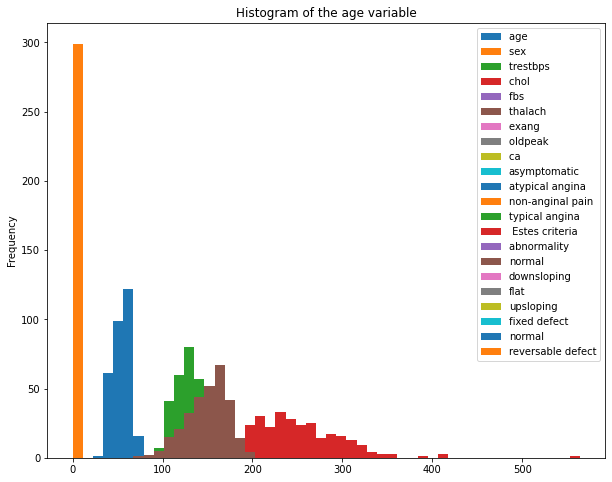

In [ ]:
#رسم نمودار هیستوگرام جهت نمایش توزیع داده در یکی از ستون ها
df.plot.hist(bins=50, figsize=(10,8), title = "Histogram of the age variable")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



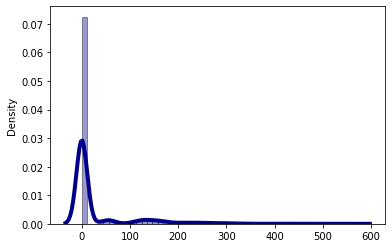

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(df, hist=True, bins= 50, color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth':4})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


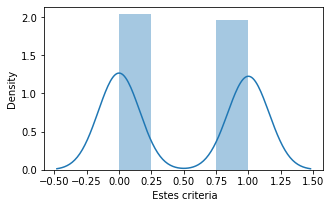

In [ ]:
plt.figure(figsize=(5,3))
plt.plot()
sns.distplot(df[' Estes criteria'])

#Z-SCORE

In [ ]:
#استاندارد سازی می کنیم تا داده های پرت شناسلسس و حدف شوند
cols = df[['age ','trestbps ', 'chol ', 'thalach ', 'oldpeak ', 'ca ']]
att=cols.values
x_scaler = StandardScaler().fit(att)
x_rescaled = x_scaler.transform(att)
set_printoptions(precision=2)
print ("\nRescaled data:\n", x_rescaled [0:5])
df_x = pd.DataFrame(x_rescaled, columns=['age ','trestbps ', 'chol ', 'thalach ', 'oldpeak ', 'ca '], )
df_x.head(5)


Rescaled data:
 [[ 0.95  0.76 -0.28  0.02  1.09 -0.72]
 [ 1.4   1.61  0.75 -1.82  0.4   2.5 ]
 [ 1.4  -0.66 -0.36 -0.9   1.35  1.43]
 [-1.94 -0.09  0.05  1.64  2.13 -0.72]
 [-1.49 -0.09 -0.85  0.98  0.31 -0.72]]


,age,trestbps,chol,thalach,oldpeak,ca
0,0.952331,0.756190,-0.283154,0.017886,1.091858,-0.715538
1,1.396901,1.605130,0.749323,-1.823154,0.399644,2.496862
2,1.396901,-0.658709,-0.361077,-0.902634,1.351438,1.426062
3,-1.937373,-0.092749,0.048018,1.639753,2.130179,-0.715538
4,-1.492803,-0.092749,-0.848095,0.982239,0.313117,-0.715538


#HISTOGRAM NORMAL

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



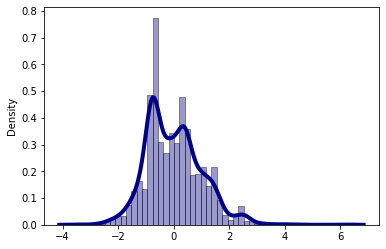

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(df_x, hist=True, bins= 50, color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth':4})

In [ ]:
del df['age ']
del df['trestbps ']
del df['chol ']
del df['thalach ']
del df['oldpeak ']
del df['ca ']
df.head(5)

,sex,fbs,exang,asymptomatic,atypical angina,non-anginal pain,typical angina,Estes criteria,abnormality,normal,downsloping,flat,upsloping,fixed defect,normal,reversable defect
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#داده های نرمال به اصل داده ها متصل شدن

In [ ]:
d_x = pd.concat([df,df_x],axis=1)
d_x.head(5)

,sex,fbs,exang,asymptomatic,atypical angina,non-anginal pain,typical angina,Estes criteria,abnormality,normal,...,upsloping,fixed defect,normal,reversable defect,age,trestbps,chol,thalach,oldpeak,ca
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.952331,0.756190,-0.283154,0.017886,1.091858,-0.715538
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.396901,1.605130,0.749323,-1.823154,0.399644,2.496862
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.396901,-0.658709,-0.361077,-0.902634,1.351438,1.426062
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-1.937373,-0.092749,0.048018,1.639753,2.130179,-0.715538
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-1.492803,-0.092749,-0.848095,0.982239,0.313117,-0.715538


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



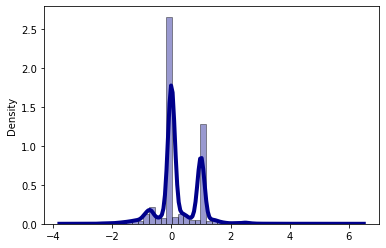

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(d_x, hist=True, bins= 50, color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth':4})

In [ ]:
dd_x = pd.concat([d_x,y],axis=1)
dd_x.head(5)

,sex,fbs,exang,asymptomatic,atypical angina,non-anginal pain,typical angina,Estes criteria,abnormality,normal,...,fixed defect,normal,reversable defect,age,trestbps,chol,thalach,oldpeak,ca,Disease
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.952331,0.756190,-0.283154,0.017886,1.091858,-0.715538,0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.396901,1.605130,0.749323,-1.823154,0.399644,2.496862,1
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.396901,-0.658709,-0.361077,-0.902634,1.351438,1.426062,1
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-1.937373,-0.092749,0.048018,1.639753,2.130179,-0.715538,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-1.492803,-0.092749,-0.848095,0.982239,0.313117,-0.715538,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



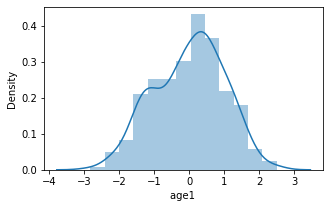

In [ ]:
plt.figure(figsize=(5,3))
plt.plot()
sns.distplot(d_x['age1 '])

In [ ]:
print('Mean value of AGE {}'.format(dd_x['age '].mean()))
print('Min value of AGE {}'.format(dd_x['age '].min()))
print('Max value of AGE {}'.format(dd_x['age '].max()))
print('Standard deviation value of AGE {}'.format(round(d_x['age '].std( ))))

Mean value of AGE -1.8862652057176572e-16
Min value of AGE -2.826512303004546
Max value of AGE 2.5083252262854647
Standard deviation value of AGE 1


#رسم باکس پلات روی داده های نرمال شده برای پیدا کردن داده های پرت

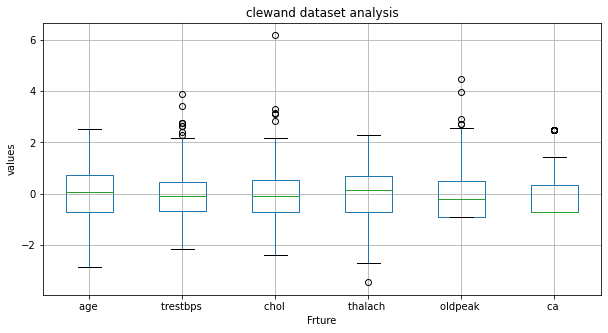

In [ ]:
length_width = dd_x[['age ','trestbps ', 'chol ', 'thalach ', 'oldpeak ', 'ca ']] #excluding species column
length_width.boxplot(figsize=(10,5))
plt.xlabel('Frture')
plt.ylabel('values')
plt.title("clewand dataset analysis")
plt.show()

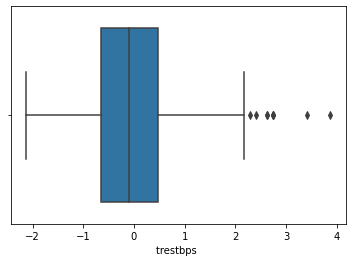

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(x=dd_x['trestbps '])

### 4. IQR
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [ ]:
Q1 = dd_x.quantile(0.25)
Q3 = dd_x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
dd_x.shape

sex                  1.000000
fbs                  0.000000
exang                1.000000
asymptomatic         1.000000
atypical angina      0.000000
non-anginal pain     1.000000
typical angina       0.000000
 Estes criteria      1.000000
abnormality          0.000000
normal               1.000000
downsloping          0.000000
flat                 1.000000
upsloping            1.000000
fixed defect         0.000000
normal               1.000000
reversable defect    1.000000
age                  1.444852
trestbps             1.131919
chol                 1.237025
thalach              1.402697
oldpeak              1.384428
ca                   1.070800
Disease              1.000000
dtype: float64


(299, 23)

In [ ]:
d_x_out = dd_x[~((dd_x < (Q1 - 1.5 * IQR)) |(dd_x > (Q3 + 1.5 * IQR))).any(axis=1)]
print(d_x_out.shape)
d_x_out.head(5)

(153, 23)


,sex,fbs,exang,asymptomatic,atypical angina,non-anginal pain,typical angina,Estes criteria,abnormality,normal,...,fixed defect,normal,reversable defect,age,trestbps,chol,thalach,oldpeak,ca,Disease
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.396901,-0.658709,-0.361077,-0.902634,1.351438,1.426062,1
7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.285476,-0.658709,2.074012,0.587731,-0.379097,-0.715538,0
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.952331,-0.092749,0.125941,-0.113617,0.313117,0.355262,1
15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.285476,1.039170,-1.549401,1.069908,0.486170,-0.715538,0
17,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.047951,0.473210,-0.166270,0.456228,0.140063,-0.715538,0


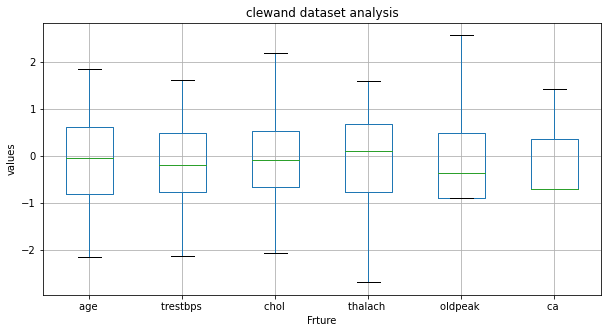

In [ ]:
length_width = d_x_out[['age ','trestbps ', 'chol ', 'thalach ', 'oldpeak ', 'ca ']] #excluding species column
length_width.boxplot(figsize=(10,5))
plt.xlabel('Frture')
plt.ylabel('values')
plt.title("clewand dataset analysis")
plt.show()

In [ ]:
#تارگت را در فولدر وای و ویژگی ها را در متغیر ایکس
xtrain= d_x_out.iloc[:,:22]
ytest = d_x_out.iloc[:,22]

#PCA
#ضریب همبستگی

In [ ]:
corrs = dd_x.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten = True)
pca.fit(xtrain)
X_pca = pca.transform(xtrain)
print("original shape:   ", xtrain.shape)
print("transformed shape:", X_pca.shape)
df_train = pd.DataFrame(X_pca)
df_train.head(5)

original shape:    (153, 22)
transformed shape: (153, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,2.016061,-0.205147,0.315750,-0.054400,1.472842,-0.311832,-1.004991,-0.207471,-0.109360,0.322343,0.600202,-0.356265
1,-0.446649,1.394462,1.643795,-1.059825,-0.451001,-0.107781,1.047562,1.605307,0.872975,-1.938052,0.864913,-1.342043
2,0.968410,0.432504,-0.068642,-0.260918,0.565490,0.109324,-1.046264,-0.187249,1.082419,0.878598,-1.313842,0.990189
3,-0.693403,0.279515,-2.215595,1.763768,1.250526,-0.618445,0.214677,0.227471,-0.199869,-1.132501,0.719667,0.824542
4,-0.441962,0.385237,-0.819383,0.235997,0.326021,0.323992,0.453355,1.443009,-0.235755,-1.700851,-0.526293,1.454126


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



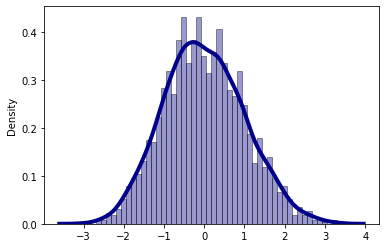

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(df_train, hist=True, bins= 50, color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth':4})

##Classifier k-Nearest Neighbors (KNN)

In [ ]:
k_range = range(1 , 30)   # range for choose best K
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytest, test_size=0.2, random_state=42)
scores = {}
scores_list = []
for k in k_range :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))



In [ ]:
print(scores_list)

[0.4838709677419355, 0.5161290322580645, 0.6129032258064516, 0.4838709677419355, 0.5483870967741935, 0.5483870967741935, 0.6129032258064516, 0.6129032258064516, 0.5483870967741935, 0.5806451612903226, 0.5483870967741935, 0.6129032258064516, 0.5806451612903226, 0.6451612903225806, 0.6129032258064516, 0.6129032258064516, 0.5806451612903226, 0.6451612903225806, 0.5483870967741935, 0.5483870967741935, 0.5483870967741935, 0.5483870967741935, 0.5483870967741935, 0.5806451612903226, 0.5806451612903226, 0.5806451612903226, 0.5483870967741935, 0.5483870967741935, 0.5483870967741935]


####The Best k is 14 in range of (1,30)





In [ ]:
  knn = KNeighborsClassifier(n_neighbors=14)
  knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

##Classifier Support Vector Machines (SVC)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
svm_acc = metrics.accuracy_score(y_test,y_pred)
print(svm_acc)

0.5806451612903226


##Classifier Decision Tree (DTC)

In [ ]:
DT = DecisionTreeClassifier(random_state=3)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
dt_acc = metrics.accuracy_score(y_test,y_pred)
print(dt_acc)

0.6129032258064516


##Classifier RandomForest (RF)

In [ ]:
RF = RandomForestClassifier(n_estimators = 1000, random_state = 42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
rf_acc = metrics.accuracy_score(y_test,y_pred)
print(rf_acc)

0.5806451612903226


##Classifier Logistic Regression (LR)



In [ ]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
lr_acc = metrics.accuracy_score(y_test,y_pred)
print(lr_acc)

0.5806451612903226


## Voting Five Classifier For Ensemble Classification
###(LR, SVC, DTC, KNN, RF)

In [ ]:
# Voting classifier
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 50)))
estimator.append(('SVC', SVC(kernel='linear', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
estimator.append(('RF', RandomForestClassifier(n_estimators = 1000, random_state = 42)))

vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)   # predict X_test labels
VOTE_ACC = metrics.accuracy_score(y_test,y_pred)
print(VOTE_ACC)

0.5806451612903226


##Confusion Matrix

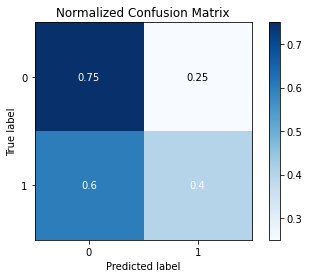

In [ ]:
from sklearn.model_selection import cross_val_predict
class_names = ['Disease']
y_pred= vot_hard.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()